In [5]:
import networkx as nx
import numpy as np
from scipy import optimize, stats
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/78081209/the-power-law-fitted-curve-doesnt-overlap-with-the-data-points

In [18]:
g = nx.powerlaw_cluster_graph(1000, 25, 0.9)
d = np.array(list(dict(g.degree).values()))

In [88]:
p = stats.powerlaw.fit(d)
p

(0.3827060795865538, 14.999999999999996, 340.07380957050646)

In [35]:
xlin = np.linspace(d.min(), d.max(), 100)
bins = np.logspace(np.log10(d.min()), np.log10(d.max()), 31)

In [39]:
density, _ = np.histogram(d, bins=bins, density=1.)

In [40]:
centers = (bins[:-1] + bins[1:]) / 2.

In [85]:
def model(x, x0, k):
    return k * np.power(x - x0, k - 1)

In [86]:
popt, pcov = optimize.curve_fit(model, centers, density)
popt, pcov

(array([-19.59973267,   0.25312944]),
 array([[ 1.36908719e+03, -2.40569007e+00],
        [-2.40569007e+00,  4.99613817e-03]]))

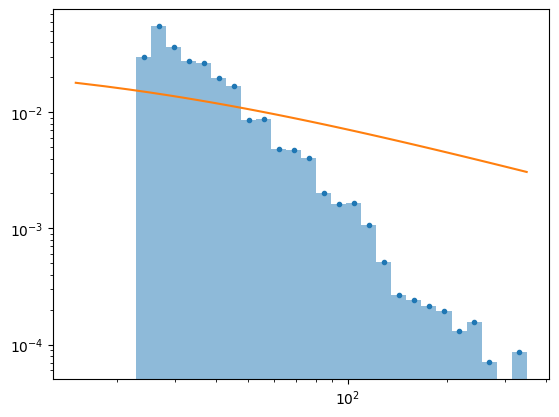

In [87]:
fig, axe = plt.subplots()
axe.hist(d, density=1., bins=bins, alpha=0.5)
axe.scatter(centers, density, marker=".")
axe.plot(xlin, model(xlin, *popt))
axe.set_xscale("log")
axe.set_yscale("log")

Calculating best minimal value for power law fit


Text(0.05, 0.5, 'KS Distance: 0.03')

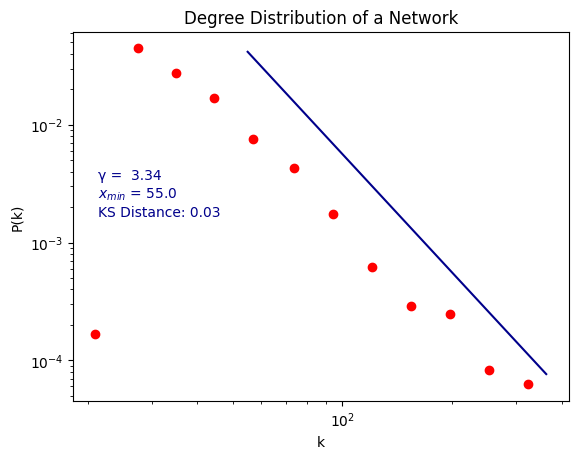

In [100]:
import networkx as nx
import powerlaw
import matplotlib.pyplot as plt

g = nx.powerlaw_cluster_graph(1000, 25, 0.9, seed=12)

degrees = list(dict(g.degree).values())

fit = powerlaw.Fit(degrees, discrete=True)

fig, ax = plt.subplots()

powerlaw.plot_pdf(degrees, color='r', marker = 'o', linestyle='', ax=ax) #plotting binned data points
fit.power_law.plot_pdf(color = 'darkblue', ax=ax) #plotting fitted curve

ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.set_title('Degree Distribution of a Network')
ax.tick_params()
plt.text(0.05, 0.6, f'γ =  {round(fit.power_law.alpha, 2)}', transform=plt.gca().transAxes, color='darkblue')
plt.text(0.05, 0.55, '$x_{min}$ = ' + f'{fit.power_law.xmin}', transform=plt.gca().transAxes, color='darkblue')
plt.text(0.05, 0.50, f'KS Distance: {round(fit.power_law.D, 2)}', transform=plt.gca().transAxes, color='darkblue')
